# Assignment A4-1 Estimate the need of parking places in the city

Estimate the need of parking places in the city.

Use the attached data to train and validate your model/

## Step 1: Imports

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

## Step 2: Data

In [2]:
# read the data
df = pd.read_excel("parking-estimation.xlsx")
# df = pd.read_excel("parking-estimation-cleaned.xlsx")

In [3]:
# get idea of the look
df.head()

,Unnamed: 0,Demand estimation using linear regression,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 29 non-null     object
 1   Demand estimation using linear regression  30 non-null     object
 2   Unnamed: 2                                 30 non-null     object
 3   Unnamed: 3                                 29 non-null     object
 4   Unnamed: 4                                 29 non-null     object
 5   Unnamed: 5                                 29 non-null     object
dtypes: object(6)
memory usage: 1.6+ KB


In [5]:
# Select correct columns
df.columns = df.iloc[2]
df.head()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50


In [6]:
# drop first 3 rows
df = df.drop(df.index[0:3])
df.head()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50
5,3,191200,15,1780000,6400,60
6,4,177600,25,1778000,6500,60
7,5,176800,25,1750000,6550,60


In [7]:
df.tail()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
26,24,123888,98,1595000,15200,175
27,25,126080,87,1590000,15600,175
28,26,151680,77,1600000,16000,190
29,27,152800,63,1610000,16200,200
30,average,160026,49.9259,NaN,NaN,NaN


In [8]:
# drop last row
df = df[:-1]
df.tail()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
25,23,126240,86,1590000,15000,165
26,24,123888,98,1595000,15200,175
27,25,126080,87,1590000,15600,175
28,26,151680,77,1600000,16000,190
29,27,152800,63,1610000,16200,200


In [9]:
# save cleaned version of data
df.to_excel("parking-estimation-cleaned.xlsx",
             sheet_name='Sheet_name_1')
df.head()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50
5,3,191200,15,1780000,6400,60
6,4,177600,25,1778000,6500,60
7,5,176800,25,1750000,6550,60


In [10]:
df.describe()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
count,27,27,27,27,27,27
unique,27,26,13,23,27,17
top,27,161600,40,1590000,14010,75
freq,1,2,5,2,1,3


In [11]:
# get idea of columns and types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 3 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   City                             27 non-null     object
 1   Number of weekly riders          27 non-null     object
 2   Price per week                   27 non-null     object
 3   Population of city               27 non-null     object
 4   Monthly income of riders         27 non-null     object
 5   Average parking rates per month  27 non-null     object
dtypes: object(6)
memory usage: 1.5+ KB


In [12]:
# see which are the attribute labels
list(df)

['City',
 'Number of weekly riders',
 'Price per week',
 'Population of city',
 'Monthly income of riders',
 'Average parking rates per month']

In [13]:
# get idea of basic statistical parameters for each column
df.describe()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
count,27,27,27,27,27,27
unique,27,26,13,23,27,17
top,27,161600,40,1590000,14010,75
freq,1,2,5,2,1,3


In [14]:
# to check null values in data
df.isnull().sum()

2
City                               0
Number of weekly riders            0
Price per week                     0
Population of city                 0
Monthly income of riders           0
Average parking rates per month    0
dtype: int64

Above representation shows that our data does not have any null values

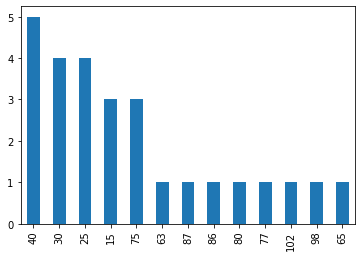

In [15]:
# plot some data
df['Price per week'].value_counts().plot(kind='bar')

In [16]:
# to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [17]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 3 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   City                             27 non-null     int64
 1   Number of weekly riders          27 non-null     int64
 2   Price per week                   27 non-null     int64
 3   Population of city               27 non-null     int64
 4   Monthly income of riders         27 non-null     int64
 5   Average parking rates per month  27 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


## Step 3: Train a Model

## 3.1 Linear Regression

In [18]:
# split the set into subsets for training and testing
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

In [19]:
train_data

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
16,14,161600,40,1695000,11600,100
5,3,191200,15,1780000,6400,60
4,2,190400,15,1790000,6200,50
26,24,123888,98,1595000,15200,175
17,15,160800,40,1690000,11800,105
7,5,176800,25,1750000,6550,60
25,23,126240,86,1590000,15000,165
9,7,180800,25,1725000,8200,75
10,8,175200,30,1725000,8600,75
8,6,178400,25,1740000,6580,70


In [20]:
test_data

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
21,19,147200,75,1630000,13224,125
20,18,115696,102,1635000,13000,110
15,13,161600,40,1695000,11330,85
28,26,151680,77,1600000,16000,190
18,16,159200,40,1630000,11830,105
19,17,148800,65,1640000,12650,105


In [21]:
dfattr = list(df)
dfattr

['City',
 'Number of weekly riders',
 'Price per week',
 'Population of city',
 'Monthly income of riders',
 'Average parking rates per month']

In [40]:
dfattr[:-1]

['City',
 'Number of weekly riders',
 'Price per week',
 'Population of city',
 'Monthly income of riders']

In [108]:
dfattr[1]

'Number of weekly riders'

In [107]:
x_train = np.array(train_data[dfattr[1]])
y_train = np.array(train_data[dfattr[-1]])
x_test = np.array(test_data[dfattr[-1]])
y_test = np.array(test_data[dfattr[-1]])

In [109]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[161600 191200 190400 123888 160800 176800 126240 180800 175200 178400
 152000 173920 163200 152800 150400 136000 192000 174400 177600 126080
 172800].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
score = reg.score(x_test, y_test)
score

0.7559728933080729

In [74]:
test = [[11, 172800, 30, 1710000, 9630]]
test = np.asarray(test)

In [75]:
prediction = reg.predict(test)
prediction

array([89.56056165])

In [94]:
# Create regressor
regressor = linear_model.LinearRegression()

In [95]:
# Train model
model = regressor.fit(x_train, y_train)

## Step 4: Test the Model

In [96]:
# make prediction
y_predicted = regressor.predict(x_test)

In [97]:
y_predicted

array([141.04124117, 141.39818401,  93.1895664 , 188.69111381,
        93.79108072, 119.04963292])

In [103]:
x_test

array([[     19,  147200,      75, 1630000,   13224],
       [     18,  115696,     102, 1635000,   13000],
       [     13,  161600,      40, 1695000,   11330],
       [     26,  151680,      77, 1600000,   16000],
       [     16,  159200,      40, 1630000,   11830],
       [     17,  148800,      65, 1640000,   12650]], dtype=int64)

In [104]:
y_test

array([125, 110,  85, 190, 105, 105], dtype=int64)

No handles with labels found to put in legend.


ValueError: x and y must be the same size

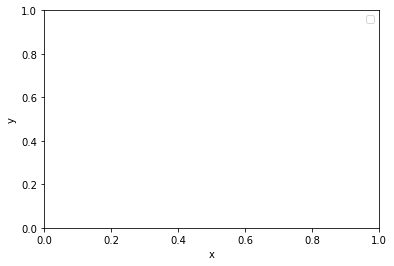

In [102]:
# plot the prediction
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.scatter(x_test, y_test, color='green', label = 'test data')
plt.plot(X_test, y_predicted, color='red', linewidth=2, label= 'predicted regression line')

# y_predicted, X_test, 
plt.show()